# 📘 Exploratory Data Analysis of Superstore Sales Dataset
## Objective: Understand sales performance, profitability, and operational drivers

## 📌 1. Import Libraries & Load Dataset

In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
%matplotlib inline
sns.set(style="whitegrid")


## 🧠 2. Initial Data Inspection

In [3]:
# Read the dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\archive\SampleSuperstore_raw_data.csv") 
# View top rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Checking for the dimension
df.shape

(9994, 13)

In [5]:
#Checking for the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Convert Postal Code column to string type
df['Postal Code'] = df['Postal Code'].astype(str)

# Confirm the change
print(df['Postal Code'].dtype)


object


I begin by inspecting the structure of the dataset to understand column types, size, and potential data quality issues.

## 🧹 3. Missing Values and Duplicate Check

In [46]:
# Check and count null values
df.isnull().sum()
# ============================
# CHECK FOR DUPLICATE ROWS
# ============================

# Count duplicate rows
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# If duplicates exist, drop them
if duplicates_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 17
Duplicates removed.


## 📊 4. Descriptive Statistics

In [8]:
#Checking for the discriptive statistics of numerical variables
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.857901,3.789574,0.156203,28.656599
std,623.245124,2.225110,0.206452,234.260115
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#Checking for the discriptive statistics of categorical variables
df.describe(include='object')


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,631,4,3,17
top,Standard Class,Consumer,United States,New York City,California,10035,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,263,3203,6026,1523


This provides insight into distributions of numeric and categorical variables.

## ⚙️ 5. Feature Engineering: Profit Margin

In [12]:
#Computing the profit margin
df['Profit_Margin'] = df['Profit'] / df['Sales']
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


Profit margin normalizes profit by sales volume, giving a clearer view of profitability.

## 💰 6. Overall Business Performance

In [42]:
# Compute totals for profit and Sales

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

# Create a summary table
summary_table = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Profit'],
    'Value': [total_sales, total_profit]
})

summary_table



,Metric,Value
0,Total Sales,"2,297,199.86"
1,Total Profit,"286,394.05"


## 🏷️ 7. Category-Level Analysis

In [14]:
# Basic statistics of item categories
category_summary = df.groupby('Category')[['Sales','Profit','Quantity']].sum()
category_summary


,Sales,Profit,Quantity
Category,,,
Furniture,741998.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145451.9773,6939


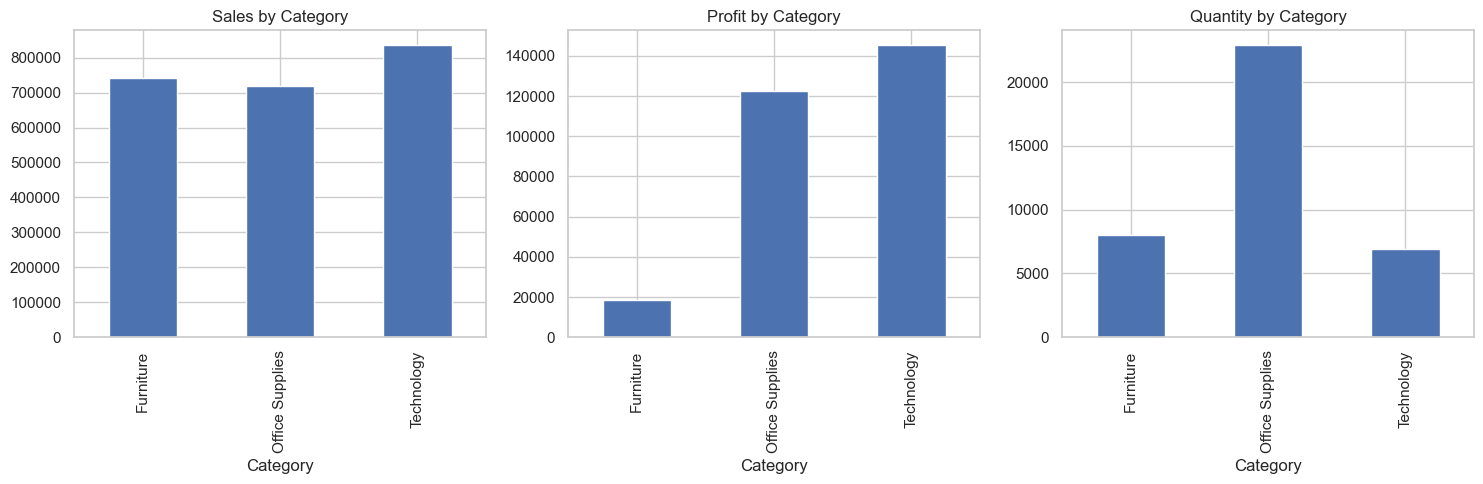

In [16]:
# Bar charts to show sales and profit patterns in all categories
fig, axes = plt.subplots(1, 3, figsize=(15,5))

category_summary['Sales'].plot(kind='bar', ax=axes[0], title='Sales by Category')
category_summary['Profit'].plot(kind='bar', ax=axes[1], title='Profit by Category')
category_summary['Quantity'].plot(kind='bar', ax=axes[2], title='Quantity by Category')

plt.tight_layout()
plt.show()


Comparing sales and profit across categories helps detect mismatches between revenue and profitability. For examples high sales in furniture category but profit is minimal

## 🌍 8. Regional Performance

In [17]:
# Regional sales and profit
region_summary = df.groupby('Region')[['Sales','Profit']].sum()
region_summary


,Sales,Profit
Region,,
Central,501239.8908,39704.3625
East,678781.2400,91522.7800
South,391720.9050,46749.4303
West,725457.8245,108417.4781


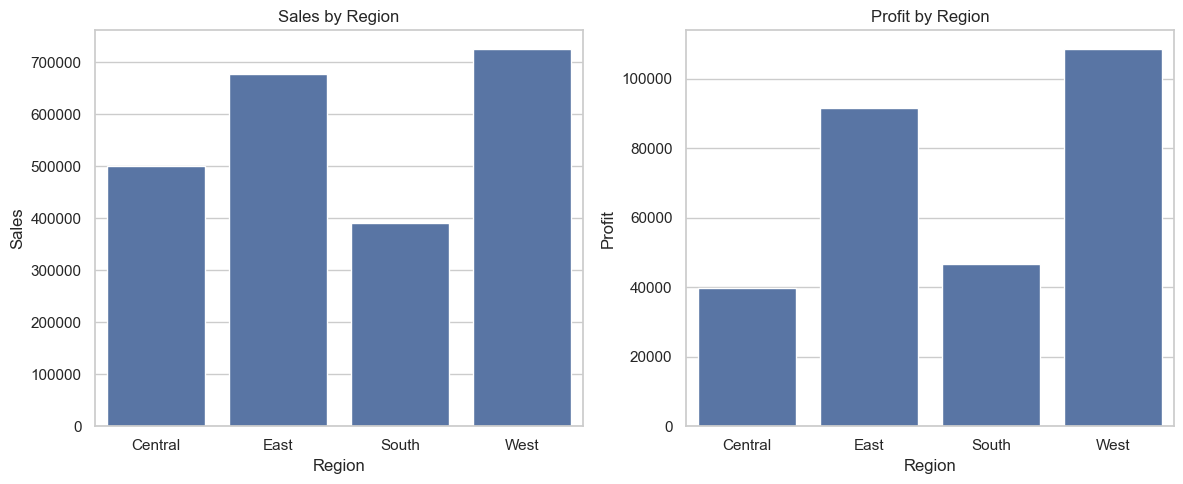

In [20]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Sales by Region
sns.barplot(x=region_summary.index, y=region_summary['Sales'], ax=axes[0])
axes[0].set_title("Sales by Region")
axes[0].set_ylabel("Sales")

# Profit by Region
sns.barplot(x=region_summary.index, y=region_summary['Profit'], ax=axes[1])
axes[1].set_title("Profit by Region")
axes[1].set_ylabel("Profit")

# Adjust layout
plt.tight_layout()
plt.show()


Regional trends reveal geographic performance disparities. Perceived failures in the southern and central region especially, since profit is low compaired to sales volumn

## 🗺️ 9. State-Level Performance

In [21]:
# Exloring sytates with low profit
state_profit = df.groupby('State')['Profit'].sum().sort_values()
state_profit.head(10)

State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64

In [22]:
# Exploring states with the least profit problems
state_profit.tail(10)


State
Delaware       9977.3748
Minnesota     10823.1874
Kentucky      11199.6966
Georgia       16250.0433
Indiana       18382.9363
Virginia      18597.9504
Michigan      24461.1876
Washington    33402.6517
New York      74038.5486
California    76380.4163
Name: Profit, dtype: float64

This highlights the most unprofitable and most profitable states. aaranged in ascending order

## 🪑 10. Sub-Category Exploration

In [23]:
# Subcategory Sales and profit
subcategory_summary = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values('Profit')
subcategory_summary

,Sales,Profit
Sub-Category,,
Tables,206964.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Supplies,46673.5380,-1189.0995
Fasteners,3024.2800,949.5182
Machines,189238.6310,3384.7569
Labels,12486.3120,5546.2540
Art,27118.7920,6527.7870
Envelopes,16476.4020,6964.1767
Furnishings,91705.1640,13059.1436


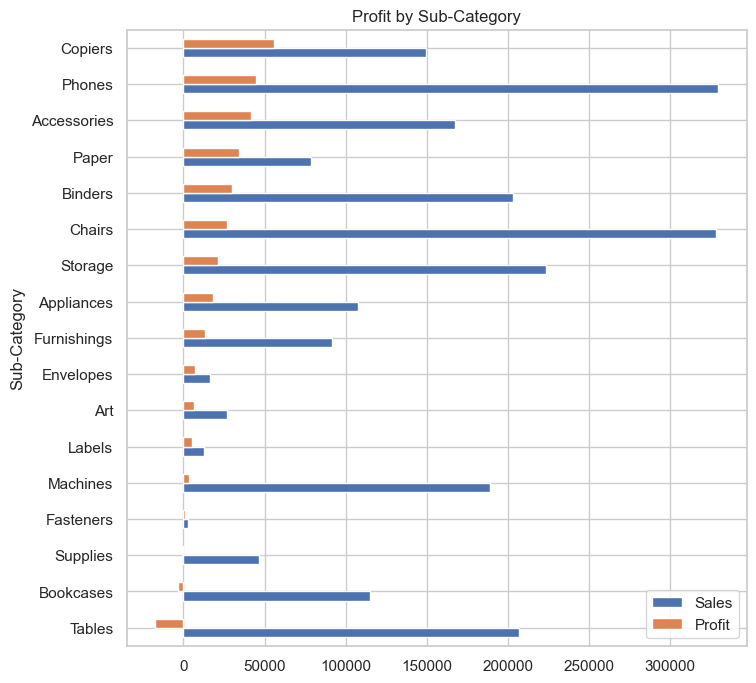

In [24]:
# sales and profit by sales category
subcategory_summary.plot(kind='barh', figsize=(8,8))
plt.title("Profit by Sub-Category")
plt.show()


Sub-category analysis identifies which products drive losses or profits.

## 🎯 11. Discount vs Profit

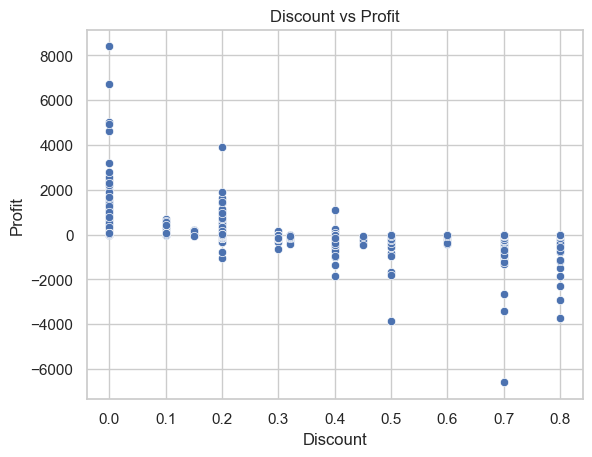

In [25]:
# profit against discount
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


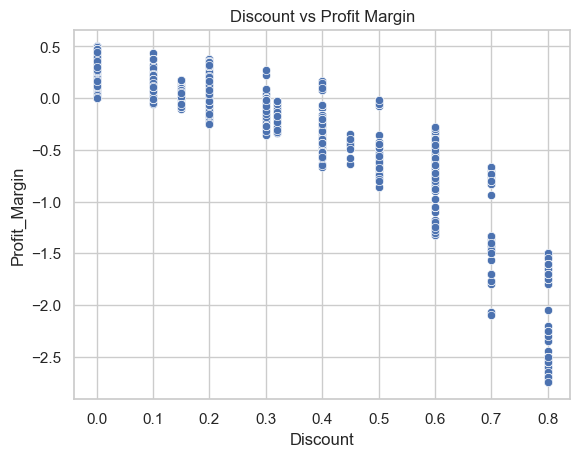

In [26]:
sns.scatterplot(data=df, x='Discount', y='Profit_Margin')
plt.title("Discount vs Profit Margin")
plt.show()

In [27]:
#Correlation between discount and profit margin
df[['Discount','Profit_Margin']].corr()

,Discount,Profit_Margin
Discount,1.000000,-0.864449
Profit_Margin,-0.864449,1.000000


Examines the relationship between discounting strategy and profitability. There's a high negative correlation between the two.

## 🚚 12. Shipping Mode Analysis

In [30]:
#Sales and profit for diffrent shipping modes
pd.options.display.float_format = '{:,.2f}'.format  # 2 decimal places, with commas
ship_summary = df.groupby('Ship Mode')[['Sales','Profit']].sum()
ship_summary


,Sales,Profit
Ship Mode,,
First Class,"351,428.42","48,969.84"
Same Day,"128,363.12","15,891.76"
Second Class,"459,192.57","57,446.64"
Standard Class,"1,358,215.74","164,085.82"


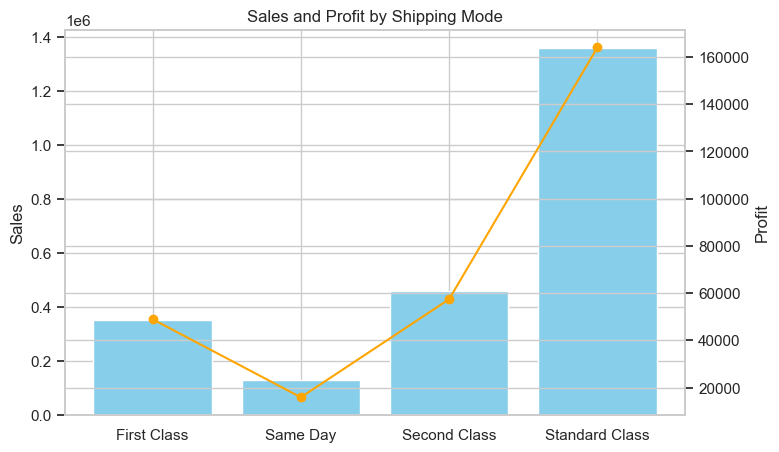

In [32]:
fig, ax1 = plt.subplots(figsize=(8,5))

# Bars for Sales
ax1.bar(ship_summary.index, ship_summary['Sales'], color='skyblue', label='Sales')
ax1.set_ylabel('Sales')

# Secondary axis for Profit
ax2 = ax1.twinx()
ax2.plot(ship_summary.index, ship_summary['Profit'], color='orange', marker='o', label='Profit')
ax2.set_ylabel('Profit')

plt.title("Sales and Profit by Shipping Mode")
plt.show()


Assesses whether shipping method influences profit. Shipping method has no significant influece on profit, profit and sales volume follow the same pattern here

## 👥 13. Segment Analysis

In [33]:
# segment exploration
segment_summary = df.groupby('Segment')[['Sales','Profit','Quantity']].sum()
segment_summary


,Sales,Profit,Quantity
Segment,,,
Consumer,"1,161,400.34","134,116.24",19521
Corporate,"706,146.37","91,979.13",11608
Home Office,"429,653.15","60,298.68",6744


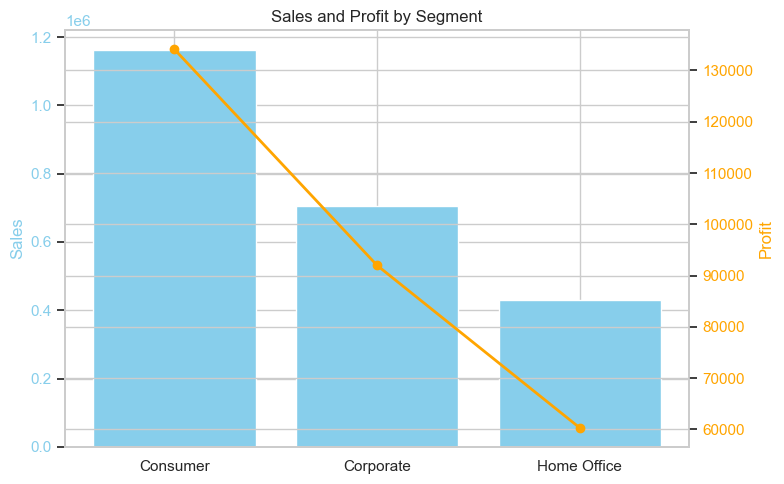

In [35]:
# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(8,5))

# Bar chart for Sales (primary axis)
ax1.bar(segment_summary.index, segment_summary['Sales'], color='skyblue', label='Sales')
ax1.set_ylabel('Sales', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Secondary axis for Profit
ax2 = ax1.twinx()
ax2.plot(segment_summary.index, segment_summary['Profit'], color='orange', marker='o', linewidth=2, label='Profit')
ax2.set_ylabel('Profit', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Sales and Profit by Segment")
fig.tight_layout()
plt.show()


Evaluates which customer segment contributes most to profit. Consumer obviously does, but this is evenly balanced considering the profit volume.

## 🔄 14. Region × Category Interaction

In [44]:
# Region vs Category exploration
pivot_region_category = pd.pivot_table(
    df,
    values='Profit',
    index='Region',
    columns='Category',
    aggfunc='sum'
)
pivot_region_category


Category,Furniture,Office Supplies,Technology
Region,,,
Central,"-2,871.05","8,879.98","33,695.43"
East,"3,046.17","41,014.58","47,462.04"
South,"6,771.21","19,986.39","19,991.83"
West,"11,504.95","52,609.85","44,302.68"


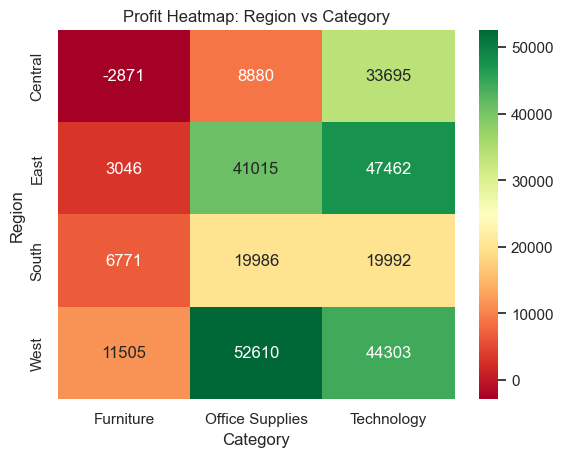

In [37]:
sns.heatmap(pivot_region_category, annot=True, fmt=".0f", cmap="RdYlGn")
plt.title("Profit Heatmap: Region vs Category")
plt.show()


Interaction analysis helps locate problem combinations of region and product category. Furnitures in the Central category is the worst so far. Furniture infact did bad relatively across all regions. Office supply in the west is our biggest win

## 🧪 15. Shipping Mode × Subcategory

In [38]:
# Ship mode x subcategory exploration
pivot_ship_sub = pd.pivot_table(
    df,
    values='Profit',
    index='Sub-Category',
    columns='Ship Mode',
    aggfunc='sum'
)
pivot_ship_sub


Ship Mode,First Class,Same Day,Second Class,Standard Class
Sub-Category,,,,
Accessories,"5,907.41","3,866.69","8,733.67","23,427.89"
Appliances,"3,543.86","1,091.66","4,906.70","8,595.79"
Art,750.35,403.44,"1,299.13","4,074.87"
Binders,"4,128.14","1,140.28","5,461.34","19,492.00"
Bookcases,-306.00,392.57,"-1,028.02","-2,531.10"
Chairs,"2,645.21","1,135.64","6,766.25","16,043.06"
Copiers,"14,798.38","2,580.95","6,883.87","31,354.62"
Envelopes,"1,001.60",348.81,"1,280.40","4,333.36"
Fasteners,127.08,46.12,158.03,618.30


Machine Losses Are Concentrated in First Class Shipping, Supplies in Standard Class, While Tables Are Unprofitable Across All Shipping Modes

## 🧾 16. Correlation Matrix

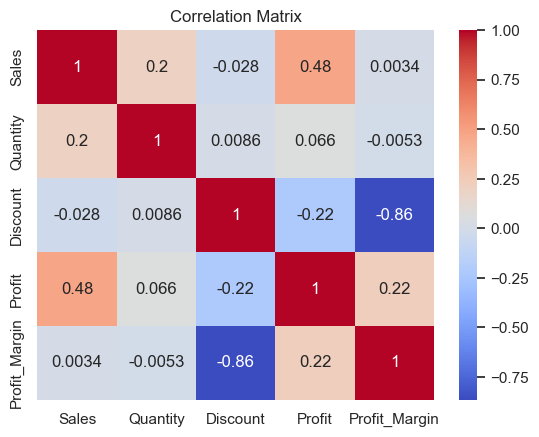

In [39]:
numeric_cols = df[['Sales','Quantity','Discount','Profit','Profit_Margin']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


This helps understand relationships among numeric variables. Discount and profit margin is the most significant relationship we have here. Sales and profit pose some value to our analysis as well

## Key Observations

### 1. Furniture Is a High-Revenue but Low-Return Category

- Furniture generates strong sales volume but delivers very weak profit margin (2.49%).

- Tables and Bookcases are the main drivers of losses across almost all regions and shipping modes.

- Furniture performs poorly in every region, with the Central and Easthern regions being the worst affected.

Business meaning:

- We are selling Furniture a lot, but at the wrong price/discount structure, making it a loss leader rather than a profit driver.

### 2. High Sales Do Not Guarantee Profit

- States like Texas, Pennsylvania, Florida, Illinois, and Ohio rank among the top in sales volume but still generate losses.

- These states account for a large portion of total negative profit.

- Meanwhile, California and New York dominate profit contribution, showing that volume can be profitable when managed correctly.

Business meaning:

- Growth is happening in the wrong places and the wrong product mixes — revenue is not translating into value.

### 3. Discounting Is the Strongest Driver of Profit Erosion

- There is a very strong negative correlation (-0.865) between discount and profit margin.

- Higher discounts consistently reduce profitability.

- The Furnishings subcategory in the Central region shows high discounts with low profit.

Business meaning:

- Discount strategy is aggressive and unmanaged, directly destroying margins.

### 4. Losses Are Concentrated in Specific Product–Region Combinations

Worst combinations identified:

- Furniture + Central Region (worst overall)

- Tables across all regions

- Machines with First Class shipping

- Supplies with Standard Class shipping

Best combinations:

- Office Supplies in the West (highest profitability)

- Phones, Copiers, Accessories, Paper, and Binders consistently profitable

- Bookcases only profitable with Same Day shipping

Business meaning:

- The problem is not the whole business — it’s specific combinations of product, region, and shipping mode.

### 5. Shipping Mode and Segment Alone Do Not Drive Profit

No significant overall relationship between:

- Segment and profit

- Ship mode and profit

However, when combined with subcategories, patterns emerge (e.g., Machines + First Class = losses).

Business meaning:

- Profitability depends on interaction effects, not single variables.

### 6. Regional Performance Is Highly Imbalanced

- Top profit states: California, New York, Washington, Michigan, Virginia, Indiana, Georgia

- Worst profit margin states: Ohio, Colorado, Tennessee, Illinois, Texas, North Carolina, Pennsylvania

- North Dakota, Maine, South Dakota, District of Columbia, Kansas, Lowa, New Mexico, Montana, Nebraska are weak in terms of sales volume but have high Profit Margin

- Southern and Central regions show high sales but weak or negative profit, indicating inefficiency.

Business meaning:

- Operational strategy in Central and Southern regions is not sustainable


## Recommendations

### 1. Fix or Exit Loss-Making Subcategories

Immediate actions:

Re-evaluate pricing and discount strategy for:

- Tables (Furniture)

- Bookcases (Furniture)

- Supplies (Office Supplies category)

Consider:

- Reducing discounts

- Renegotiating supplier costs

- Bundling with high-margin products

- Removing the worst-performing SKUs

Priority: Furniture in the Central, Southern and Easthern regions.

### 2. Implement Discount Control Policies

-Set maximum discount thresholds by subcategory.

- Require approval for high discounts on low-margin items.

- Monitor discount vs profit margin weekly.

Expected impact: Immediate improvement in overall profitability.



### 4. Expand Market on States and Products with High-Return and High profit margins

High Returns:

States: California, New York, Washington, Indiana, Georgia

Subcategories: Copiers, Phones, Accessories, Paper, Binders

High Profit Margins(Great potentials)

States: North Dakota, Maine, South Dakota, District of Columbia, Kansas, Lowa, New Mexico, Montana, Nebraska

Subcategories: Labels, Copiers, Papers, Phones, Envilopes, Fasteners

Strategy: Shift marketing and inventory toward potential and proven profitable segments instead of loss-heavy states would increase profit weight.

### 4. Redesign Shipping Strategy for Loss-Making Products

Avoid:

- First Class shipping for Machines

- Standard Class for Supplies

- Encourage Same Day shipping for Bookcases (only profitable option)

Shipping policy should be product-specific, not uniform.

### 5. Investigate High-Sales but Loss States

Target states for deep operational review:

- Texas

- Ohio

- Pennsylvania

- Illinois

- Florida

Check:

- Discount levels

- Cost of logistics

- Product mix

- City-level performance

These states can turn profitable with optimization, not abandonment.

### 6. Regional Strategy Realignment

Central, Eastern & Southern regions need:

- Tighter discount control

- Reduced Furniture exposure

- Focus on Office Supplies and Technology products

West region model (Office Supplies success) can be replicated elsewhere.


## 🧠 Executive Summary

The company’s profitability problem is not low sales but poor product–region–discount alignment. Furniture and heavy discounting in Central, Eastern and Southern regions drive most losses, while Office Supplies and Technology products in Western and Eastern states generate strong profits. Controlling discounts, fixing Furniture pricing, and focusing on profitable regions and subcategories can significantly improve margins.